# Module 3 - Machine Learning for Classification 

### Using Logistic Regression for Churn Prediction

## Data Preparation

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
!wget $data -O telco-churn.csv

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [163]:
df=pd.read_csv('telco-churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [164]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [165]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [166]:
df.columns=df.columns.str.lower()

In [167]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

In [168]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [169]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

**because we replaced empty spaces of 'object' type with _,
there's an error when we try to convert totalcharges to numeric type
so we pass errors as 'coerce' to turn those erroneous entries to nan type**

In [170]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [171]:
df['totalcharges'].isnull().sum()

np.int64(11)

In [172]:
df['totalcharges']=df['totalcharges'].fillna(0)

In [173]:
df.churn = df.churn.str.replace('no','0').str.replace('yes','1').astype(int)

In [174]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

## Setting the Validation Framework using Scikit Learn 

**splitting the dataset to train, val and test using Scikit-Learn**

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [177]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [178]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [179]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [180]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [181]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [182]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

## EDA 

**we're using df_full_train for exploratory data analysis** 

In [183]:
df_full_train=df_full_train.reset_index(drop=True)

In [184]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [185]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [186]:
(len(df_full_train[df_full_train.churn == 1])/len(df_full_train))*100

26.996805111821086

In [187]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [188]:
df_full_train.churn.mean() # because it sums all the 1's - 
#it's the same as % of rows where churn=1 

np.float64(0.26996805111821087)

In [189]:
global_churn_rate = round(df_full_train.churn.mean(),2)
global_churn_rate

np.float64(0.27)

In [190]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [191]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']
categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 
        'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
        'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [192]:
df_full_train[categorical_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance : Churn Rate and Risk Ratio

In [193]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [194]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [195]:
df_full_train.partner.value_counts()


partner
no     2932
yes    2702
Name: count, dtype: int64

In [196]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner,churn_no_partner

(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [197]:
global_churn_rate - churn_partner, global_churn_rate - churn_no_partner

(np.float64(0.06496669133974836), np.float64(-0.0598090040927694))

**i.e the partner feature is more important when considering the churn rate** 

1. Difference 

    GLOBAL - GROUP(FROM A FEATURE)
    
    if > 0 - less likely ot churn 
    
    if < 0 - more likely to churn 

**RISK RATIO**

In [198]:
churn_partner/global_churn_rate, churn_no_partner/global_churn_rate

(np.float64(0.7593826246675986), np.float64(1.22151482997322))

2. RISK RATIO 

   GROUP(FROM A FEATURE) / GLOBAL 
    
    if > 1 - more likely to churn 
    
    if < 1 - less likely to churn 

In [199]:
df_group=df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [200]:
from IPython.display import display

In [201]:
for c in categorical_features:
    df_group=df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    print(c)
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


**conclusion - it would be nice to have one variable that takes everything into account for each group and tells us its `importance`**

## Feature Importance: Mutual Information

In [202]:
# here mutual means churn with any other variable/feature - 
# so how much do we learn about churn if we observe values of another feature

In [203]:
 from sklearn.metrics import mutual_info_score

In [204]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [205]:
# the above uses a formula (that we don't need to get into now) - 
# to score two variables. 

In [206]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [207]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [208]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)
mi_score=df_full_train[categorical_features].apply(mutual_info_churn_score)

In [209]:
mi_score.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

**the difference between mutual info and correlation is that the former is for catgorical features and the latter for numeric features**

Using **pearson correlation coefficient**

when the coefficient is positive -> if one var grows, the other grows too. 

when the coefficient is negative -> if one var grows, the other drops. 

0.0 - 0.1 / 0.0 - (-0.1) - LOW CORRELATION <br>
0.2 - 0.5 / (-0.2) - (-0.5) - MODERATE CORRELATION <br>
0.6 - 1 / (-0.6) - (-1) - STRONG CORRELATION <br>


In our case,<br>
x - feature/variable <br> 
y - binary variable

let's say x -> tenure, and y -> churn. 

In [210]:
df_full_train[numerical_features].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

with increase in tenure, there's less chance to churn 
<br>
similarly, when monthlycharges increases, there's less chance to churn (because there's a correlation between tenure and monthlycharges - people who've been with the telcom for longer have paid more in charges)

In [211]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [212]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [213]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

**as you can see - the longer the customer has stayed with the company, the less likely he is to churn - NEGATIVE CORRELATION** 

In [214]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [215]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [216]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

**here, it's clear that the more the monthly charge, the more likely customer is to churn - POSITIVE CORRELATION**

## ONE-HOT ENCODING 

encoding categorical variables 

the last time we did this by turning one variable/feature into many - ex. car number of doors were 2,3,4 so, we made columns num_of_doors_2 (1,0), num_of_doors_3 (1,0), num_of_doors4 (1,0). 

For this example, let's consider Gender + Contract combinations

In [217]:
df_full_train['contract'].value_counts()

contract
month-to-month    3104
two_year          1344
one_year          1186
Name: count, dtype: int64

and gender is M,F

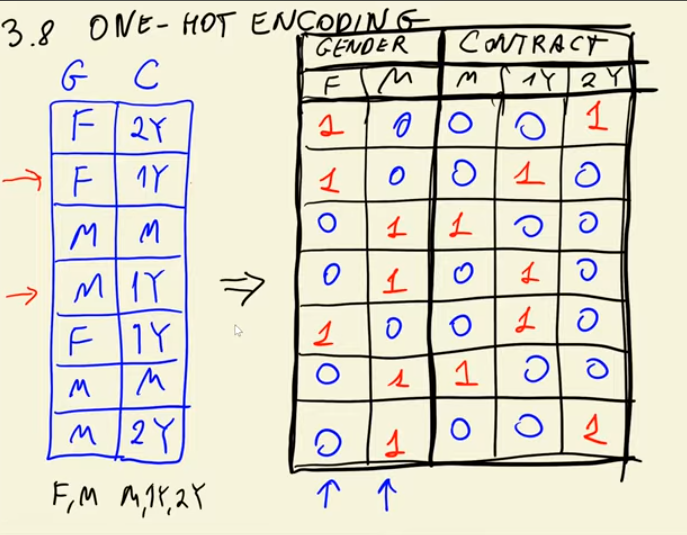

**the 'hot' is a reference to items that are '1'**

In [218]:
from sklearn.feature_extraction import DictVectorizer

In [219]:
train_dicts=df_train[categorical_features + numerical_features].to_dict(orient='records')

In [220]:
dv = DictVectorizer() #it's called vectorizer because we take a dictionary and turn it into a vector. 
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [221]:
dv.transform(train_dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80275 stored elements and shape (4225, 45)>

> **_Note:_** look up sparse matrix <br>
> They're matrices that have a greater number of 0's and are sparesely filled with other numbers - generally used in ML(one-hot encoded features, TF-IDF vectors), graph algos, scientific computing


In [222]:
dv = DictVectorizer(sparse=False) 

# DictVectorizer converts a list of Py Dictionaries to a numeric feature matrix. 
# Each key in the dict becomes a column(feature)
# Each value becomes an entry in the column 
# Categorical/string values are automatically one-hot encoded 
# Numerical values are left as-is

# sparse=False returns a sparse matrix

dv.fit(train_dicts)


,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


<details>
<summary>DictVectorizer Summarized</summary>

---

## What is DictVectorizer?

`DictVectorizer` is a tool from **scikit-learn** that converts **lists of Python dictionaries** into **numeric matrices** that computers can understand.  

- Each dictionary represents a **data sample**.  
- Keys are **feature names** (like "city" or "temperature").  
- Values can be **categorical (strings)** or **numeric**.  

ML models **cannot understand strings**, so we need to convert everything into numbers.

---

## Step 1: Identify Features

Suppose you have this data:

```python
data = [
    {"city": "Paris", "temperature": 20},
    {"city": "London", "temperature": 15},
    {"city": "Berlin", "temperature": 17}
]
```
Numeric features → keep as-is (temperature)

Categorical features → turn into one-hot encoded columns: each unique value becomes a column

Columns after scanning:

Column Index	Feature Name
0	city=London
1	city=Paris
2	city=Berlin
3	temperature

## Step 2: Encode Each Sample

Numeric → put the value in the right column

Categorical → put 1 in the column corresponding to the value, 0 elsewhere

Sample	city=London	city=Paris	city=Berlin	temperature
1	0	1	0	20
2	1	0	0	15
3	0	0	1	17

This is the dense representation — all 0s and 1s are stored explicitly.


## Step 3: Dense vs Sparse Representation

Dense Matrix:

    - Stores every value, including zeros.
    - Good for small datasets.

Sparse Matrix:

    - Stores only the non-zero values and their positions.
    - Saves memory for large datasets with lots of zeros (common in one-hot encoding).

Example (sparse):

```sql
Row 0: column 1 = 1, column 3 = 20
Row 1: column 0 = 1, column 3 = 15
Row 2: column 2 = 1, column 3 = 17
```

This is stored in a Compressed Sparse Row (CSR) format internally.

## Step 4: Why Do We Use It?

Most ML models require numeric input.

DictVectorizer lets you quickly convert categorical + numeric features into a matrix ready for modeling.

Using sparse matrices saves memory and computation time for large datasets.

</details>

In [223]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [224]:
# dv.get_feature_names() - this was deprecated 

# now, it is get_feature_names_out()

In [225]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [226]:
X_train = dv.fit_transform(train_dicts)

# this is the same as dv.fit(train_dicts) then dv.transform(train_dicts)

**this is our FEATURE MATRIX now**

In [227]:
X_train.shape

(4225, 45)

In [228]:
val_dicts = df_val[categorical_features + numerical_features].to_dict(orient='records')

In [229]:
X_val = dv.transform(val_dicts)

**we don't do fit on validation dataset because fit() learns rules from data () <br>
incase of dictvectorizer, fit() scans the training data and figures out `what are all the features/columns?` + `what encoding to use for each feature?`<br> basically, it builds the rules for transforming data**

**transform() applies learned rules to data.**

**In case of validation datasets, we must use the same rules learned from training dataset cause 'fitting' on validation would give unrealistically good performance**

**Now, `dv.fit(train_dicts)`**

**fit() learns the feature mapping from the training data.<br>
It modifies the dv object in place.<br>
It does not return the transformed data, so there’s usually no need to assign it**
<br><br>
**`transform()` applies the mapping learned during fit().
<br>
It does not try to learn anything new.**




## Logistic Regression 


A refresher so far, 

**Supervised Learning**

    Definition: Learn a mapping from inputs → outputs using labeled data.

    Use: Predict outcomes based on past examples.

**Types & Examples:**

<br><Br>

**Regression** (Predict **continuous values**)

| Subtype | Description | Examples |
|---------|-------------|---------|
| 🟢 **Simple Linear Regression** | Predict one numeric target from one feature | House price vs. size |
| 🟢 **Multiple Regression** | Predict one numeric target from multiple features | Predict salary from experience, education, location |
| **Polynomial Regression** | Fit a non-linear relationship | Predict growth trends |
| 🟢 **Regularized Regression** | Avoid overfitting by penalizing coefficients | Ridge, Lasso |

---
<br><Br>
**Classification** (Predict **categorical labels**)

| Subtype | Description | Examples |
|---------|-------------|---------|
| 🟢 **Binary Classification** | Two classes (0/1, yes/no) | Spam vs. not spam, Disease vs. Healthy |
| **Multi-Class Classification** | More than two classes, each sample belongs to **exactly one class** | Handwritten digits 0–9, Animal type |
| **Multi-Label Classification** | Each sample can belong to **multiple classes simultaneously** | News categories, Music genres |
| **Imbalanced Classification** | Classes have very different frequencies | Fraud detection, Rare disease prediction |

**Note:** Logistic Regression is technically a regression method mathematically, but when applied to categorical outputs it’s used for **binary or multi-class classification**.

---

### **Summary Table**

| Task Type | Output Type | Common Subtypes |
|-----------|------------|----------------|
| Regression | Continuous | Simple, Multiple, Polynomial, Regularized |
| Classification | Discrete / Categorical | Binary, Multi-Class, Multi-Label, Imbalanced |

### RIGHT NOW, WE'RE LOOKING AT BINARY CLASSIFICATION

g(x<sub>i</sub>) = w0 + w<sup>t</w>x<sub>i</sub>

**linear regression outputs a number between -inf to inf (real numbers)
and logistic regression outputs a number between 0,1**

it uses a special func called SIGMOID i.e, SIGMOID(w0 + w<sup>t</w>x<sub>i</sub>)

In [230]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [231]:
z = np.linspace(-7,7,51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [232]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

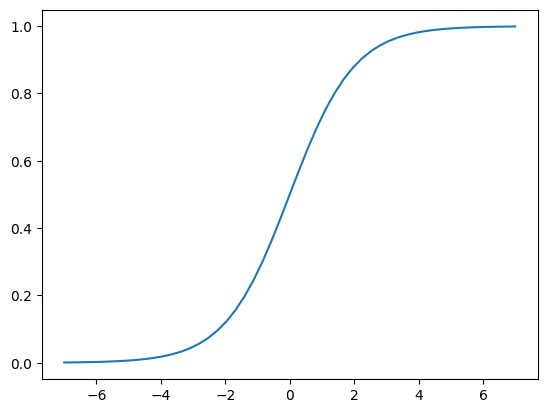

In [233]:
plt.plot(z,sigmoid(z))

In [234]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j]*w[j]
    return result    

In [235]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result

## Training Logistic Regression with Scikit-Learn

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
model = LogisticRegression()
model.fit(X_train,y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [238]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

**the above is w - weight vector**

In [239]:
model.intercept_[0]


np.float64(-0.10913176644533581)

**intercept gives w0 - the bias term**

In [240]:
model.predict(X_train) # hard prediction

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [241]:
model.predict_proba(X_train) # soft prediction

array([[0.90416494, 0.09583506],
       [0.3210407 , 0.6789593 ],
       [0.36668394, 0.63331606],
       ...,
       [0.46853433, 0.53146567],
       [0.9576116 , 0.0423884 ],
       [0.30173516, 0.69826484]], shape=(4225, 2))


i.e the customer corresponding to the first row of our 
train dataset has 90.4% of no-churn probability 
and 9.6% possibility of churning


In [242]:
print(model.classes_)


[0 1]


**COLUMN 0 - CORRESPONDS TO  NO-CHURN <br>
COLUMN 1 - CORRESPONDS TO CHURN**

In [243]:
#y_pred =model.predict_proba(X_train)[:,1]

In [244]:
y_pred =model.predict_proba(X_val)[:,1]

In [245]:
churn_decision = (y_pred >= 0.5)

In [246]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

**the above will result in a column of customer's that are more likely to churn - so we target them for promotional emails, offers etc**

**now let's check how accurate our predictions are**

**the RMSE equivalent in logistic regression is 'accuracy**


In [247]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [248]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [249]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8034066713981547)

In [250]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [251]:
df_pred['cor'] = df_pred.prediction == df_pred.actual

In [252]:
df_pred

,probability,prediction,actual,cor
0,0.009001,0,0,True
1,0.204090,0,0,True
2,0.211725,0,0,True
3,0.542751,1,1,True
4,0.213315,0,0,True
...,...,...,...,...
1404,0.313144,0,0,True
1405,0.039347,0,1,False
1406,0.136351,0,0,True
1407,0.799424,1,1,True


In [253]:
df_pred.cor.mean()

np.float64(0.8034066713981547)

 ## Model Interpretation

In [254]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [255]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [256]:
a=[1,2,3,4]
b=['a','b','c','d']
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [257]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [258]:
small = ['contract', 'tenure', 'monthlycharges']

In [259]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [260]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [261]:
dv_small = DictVectorizer(sparse=False)

In [262]:
dv_small.fit_transform(dicts_train_small)
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [263]:
X_train_small = dv_small.fit_transform(dicts_train_small)

In [264]:
X_val_small = dv_small.transform(dicts_val_small)

In [265]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [266]:
w0=model_small.intercept_[0] 
w0

np.float64(-2.477957595284362)

**`intercept_` and `coef_` are capable of handling multiclass problems that's why more than one index/item - in this case, because it's binary classification len(model.coef_) and len(model.intercept_) is 1**

In [267]:
w=model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [268]:
model_small.coef_

array([[ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005]])

In [269]:
dict(zip(dv_small.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'monthlycharges': np.float64(-0.03),
 'tenure': np.float64(-0.078)}

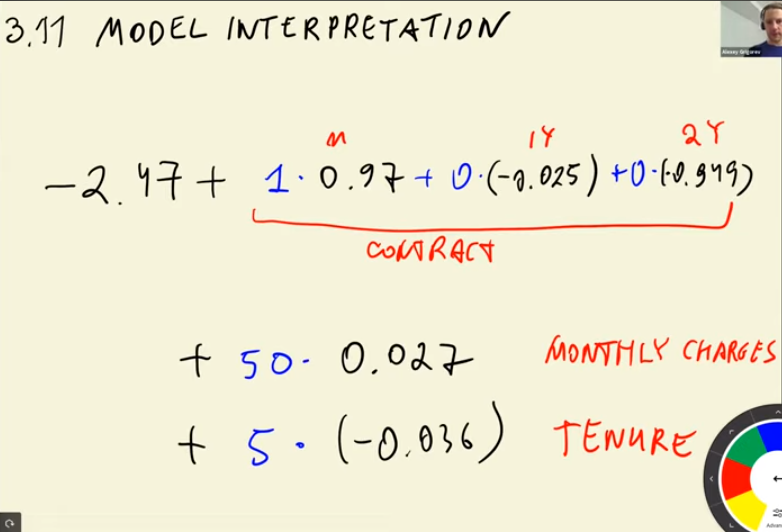

considering one customer - let's say he's on a monthly contract + he's paying 50 dollars a month, and has been with the company for 5 years

In [270]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

the bias term is what we assume without knowledge 
so, here, by default, the probability of someone leaving the company will be 7% 

In [271]:
sigmoid(-2.47 + 0.97 + 50*0.027 - 5*0.036) 

np.float64(0.41824062315816374)

In [272]:
# the -ve number indicated negative correlation - i.e the var value increases, and churn decreases

In [273]:
-2.47 + 0.97 + 50*0.027 - 5*0.036

-0.3300000000000001

In [274]:
sigmoid(_) # underscore takes the output of the last cell in jupyter

np.float64(0.41824062315816374)

In [275]:
-2.47 + 0.97 + 60*0.027 - 1*0.036 # tenure of 1 month+ paying 60 dollars per month

0.08399999999999966

In [276]:
sigmoid(_)

np.float64(0.5209876607065322)

In [277]:
# higher chances of churning now ^^

## Using the Model 

In [278]:
dicts_full_train = df_full_train[categorical_features + numerical_features].to_dict(orient='records')

# from df we get dicts - from dicts we get feature matrix - 
# then we train a model on the feature matrix 
# then we repeat for test
# this is how we get predictions
# complete accuracy


In [279]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [280]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [281]:
y_full_train = df_full_train.churn.values

**You remove the target (in this case, `churn`) only when you’re actively training or validating a model. You keep it in `df_full_train` until you’re ready to use that dataset for final training.**

In [282]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [283]:
# now repeat the above for test dataset 

In [284]:
dicts_test = df_test[categorical_features + numerical_features].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [285]:
y_pred = model.predict_proba(X_test)[:,1]

In [286]:
churn_decision = (y_pred >= 0.5)

In [287]:
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

In [288]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [289]:
customer = dicts_test[10]

Earlier, when you trained + validated separately, you removed churn only from df_train and df_val temporarily (to feed into the model as X_train and X_val).

But you didn’t remove it from df_full_train, because later you needed:

y_full_train = df_full_train.churn.values

<u>to train your final model on all labeled data before testing.</u>

**Analogy:**

Imagine teaching a student (the model) with a study guide (features).
If you don’t tell them the correct answers (the target), they can’t actually learn what’s right or wrong.


So in short:

**You keep churn in df_full_train because it’s the true answer your model learns from during final training.**

In [290]:
X_customer = dv.transform([customer]) 
X_customer.shape

(1, 45)

In [293]:
model.predict_proba(X_customer)[0,1]

np.float64(0.4979548499430508)

In [294]:
# ^^ here has only 49% chance of churning - <0.5 so we say he's not churning.

In [295]:
y_test[10]

np.int64(0)

**i.e he didnot churn**

In [296]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [297]:
X_customer = dv.transform([customer]) 
model.predict_proba(X_customer)[0,1]

np.float64(0.6546648535787962)

**because >50% - she will churn**

In [298]:
y_test[-1]

np.int64(1)

**1 says she will churn**

In [ ]:
# so our model works - we will send promotional emails to customer -1